In [26]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
wholesale_dataset = pd.read_csv('..\\..\\Datasets\\WholesaleCustomers.csv')
print(wholesale_dataset.shape, '\n')
wholesale_dataset.head()

(440, 8) 



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Printing basic info of the dataset
wholesale_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
# Printing basic statistics of the dataset
wholesale_dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Checking for the missing values
print('Missing values in the dataset:', wholesale_dataset.isnull().sum().sum())

Missing values in the dataset: 0


-> Since there are no missing values in the dataset, we can proceed towards the implementation of clustering algorithms.

<hr>

## <b>Exercise 01: K-Means Clustering for Customer Segmentation</b> 
#### <b>Task:</b> Use K-Means clustering to segment customers in the Wholesale Customers dataset based on their annual spending in different categories. Visualize the clusters.

In [7]:
# Selecting relevant features for clustering
features = wholesale_dataset[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [8]:
# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [11]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

In [12]:
# Adding the cluster labels to the original dataset
wholesale_dataset['Cluster'] = clusters

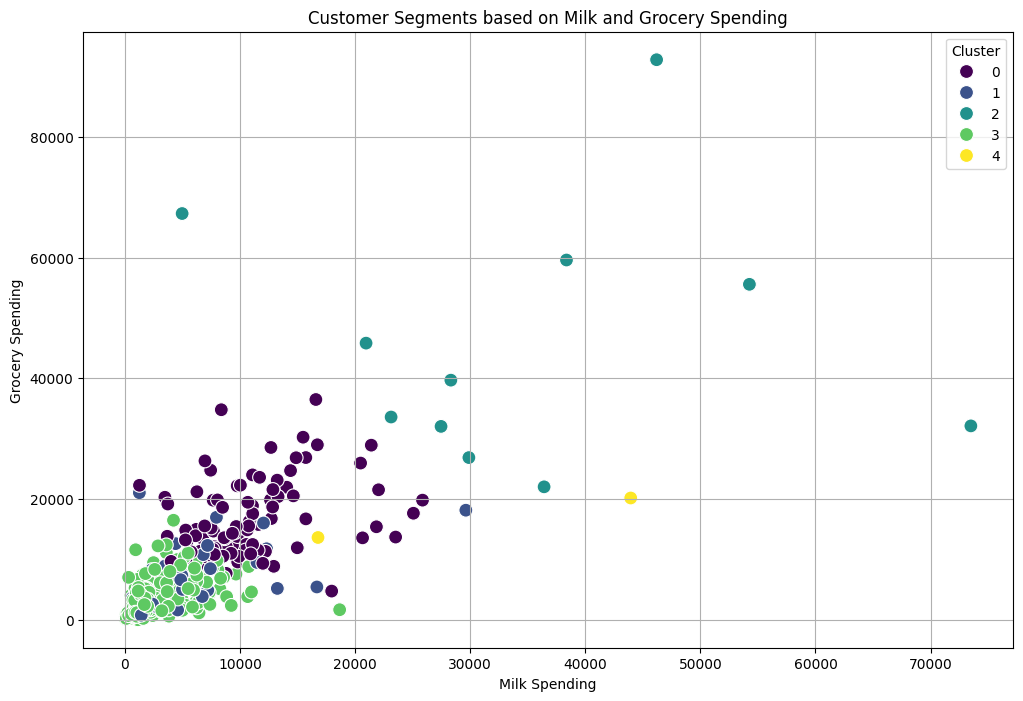

In [13]:
# Visualizing the resulting clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=wholesale_dataset, x='Milk', y='Grocery', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Milk and Grocery Spending')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.legend(title='Cluster')
plt.grid()
plt.show()

-> The scatter plot illustrates distinct customer segments based on their spending in Milk and Grocery categories, with each color representing a different cluster formed by the K-Means algorithm. Each cluster shows varying densities, indicating diverse spending behaviors among customers. For instance, some clusters contain customers who spend significantly more on Milk, while others focus their expenditures on Grocery. The separation between clusters suggests that K-Means successfully identified unique segments within the dataset, enabling targeted marketing strategies based on specific spending patterns.

<hr>

## <b>Exercise 02: Evaluating the Optimal Number of Clusters</b> 
#### <b>Task:</b> Determine the optimal number of clusters for the Wholesale Customers dataset using the Elbow Method and Silhouette Score. Visualize the results and justify your choice.

In [15]:
# Selecting relevant features for clustering
X = wholesale_dataset[['Milk', 'Grocery']]

In [16]:
# Initialize lists to store WCSS and Silhouette Scores
wcss = []
silhouette_scores = []

# Evaluate different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

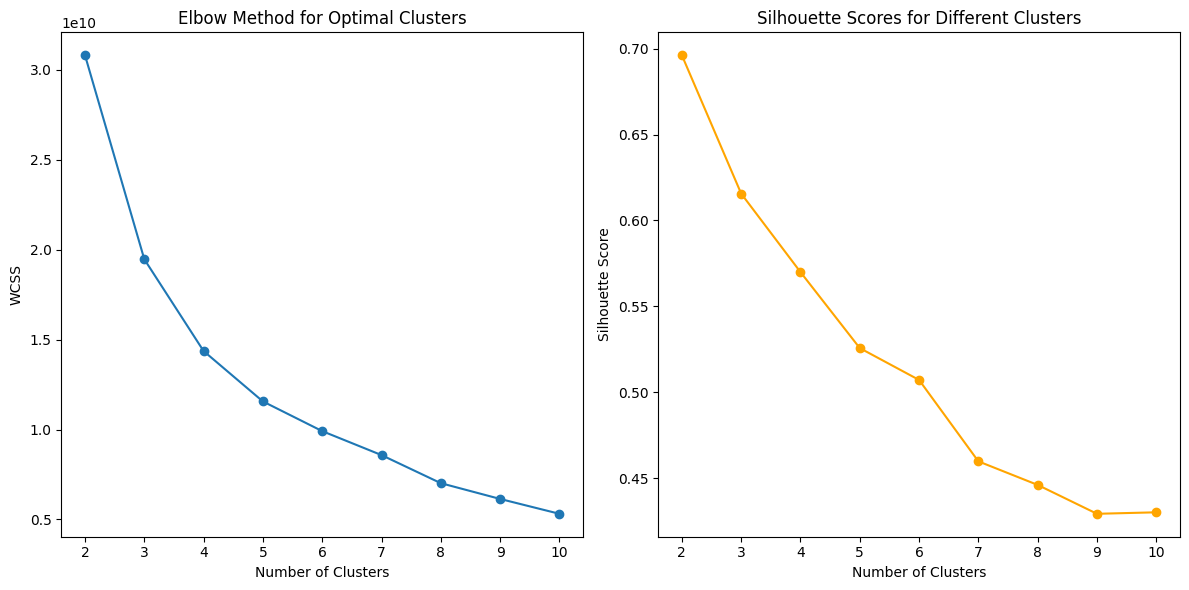

In [17]:
# Plotting the plots
plt.figure(figsize=(12, 6))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))

plt.tight_layout()
plt.show()

<h2><b>Justification of the Chosen Number of Clusters</b></h2>

<h4><b>Elbow Method:</b></h4>
<p>The elbow point on the WCSS graph indicates the number of clusters where adding more clusters does not significantly reduce WCSS. For example, if the elbow appears at 4, it suggests that 4 is the optimal number of clusters.</p>

<h4><b>Silhouette Score:</b></h4>
<p>The silhouette score graph shows the average silhouette score for each number of clusters. A peak in the silhouette score can indicate the best clustering solution. If the maximum score is at 4, it reinforces the choice of 4 clusters.</p>

<hr>

## <b>Exercise 03: Cluster Analysis and Interpretation</b> 
#### <b>Task:</b> Interpret the clusters formed in the Wholesale Customers dataset. Identify the characteristics and differences among the clusters based on spending behavior.

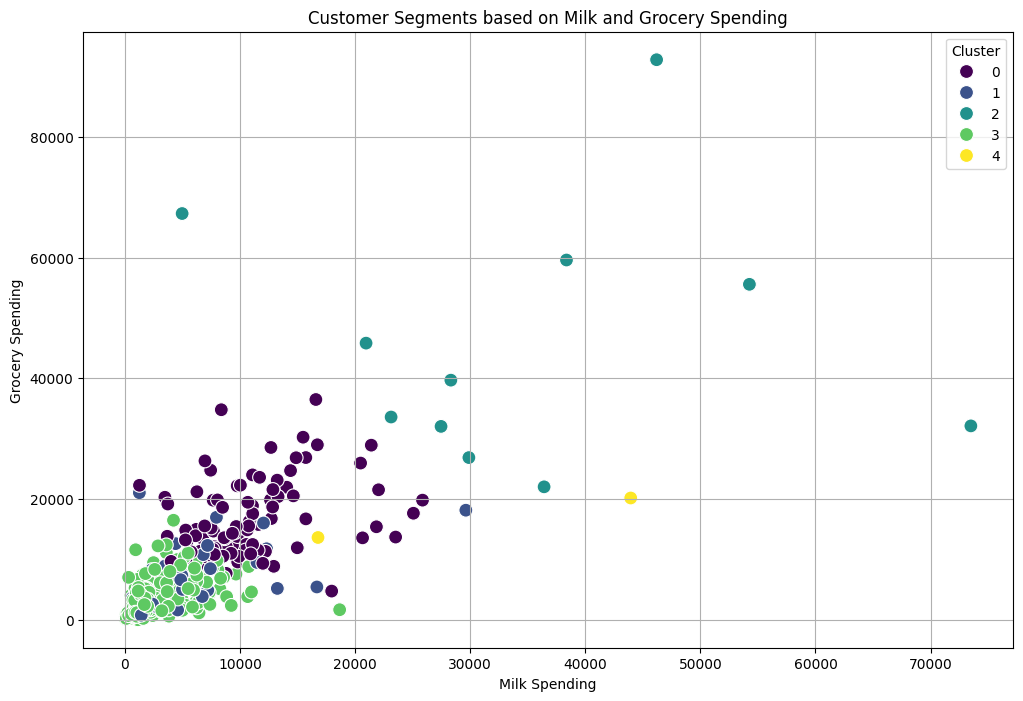

In [18]:
# Visualizing the resulting clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=wholesale_dataset, x='Milk', y='Grocery', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Milk and Grocery Spending')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.legend(title='Cluster')
plt.grid()
plt.show()

<h2><b>Cluster Analysis and Interpretation</b></h2>

<p>After applying K-Means clustering to the Wholesale Customers dataset, we can analyze and interpret the characteristics of the formed clusters based on spending behavior across different categories.</p>

<h4><b>1) Cluster Composition:</b></h4>
<p>Each cluster represents a distinct segment of customers, characterized by their spending patterns in various categories such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen. By examining the mean spending values in these categories for each cluster, we can identify unique spending behaviors.</p>

<h4><b>2) High-Spending Cluster:</b></h4>
<p>One cluster may consist of customers who spend significantly across all categories, indicating they are major consumers of wholesale products. These customers likely represent businesses or retailers with high inventory turnover.</p>

<h4><b>3) Low-Spending Cluster:</b></h4>
<p>Another cluster might include customers with low overall spending across all categories. This group could represent small businesses or individual customers with minimal purchasing needs, possibly indicating price sensitivity or limited inventory requirements.</p>

<h4><b>4) Specialty Spenders:</b></h4>
<p>A cluster could consist of customers who primarily spend on specific categories, such as Milk and Grocery, while spending less on Fresh and Frozen items. This suggests a focus on certain product lines, which could inform targeted marketing strategies for these segments.</p>

<h4><b>5) Seasonal or Niche Markets:</b></h4>
<p>Additionally, there might be clusters characterized by high spending in seasonal items or niche products. For example, a cluster with high spending on Frozen items could indicate customers who prioritize frozen goods for convenience, which can influence product stocking decisions.</p>


<hr>

## <b>Exercise 04: Hierarchical Clustering: Dendrogram and Cluster Formation</b> 
#### <b>Task:</b> Apply hierarchical clustering to the Wholesale Customers dataset and visualize the dendrogram. Compare the cluster assignments with those obtained from K-Means.

In [21]:
# Select relevant features for K-Means
X = wholesale_dataset[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Add K-Means cluster labels to the dataset
wholesale_dataset['KMeans_Cluster'] = kmeans_clusters

In [24]:
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

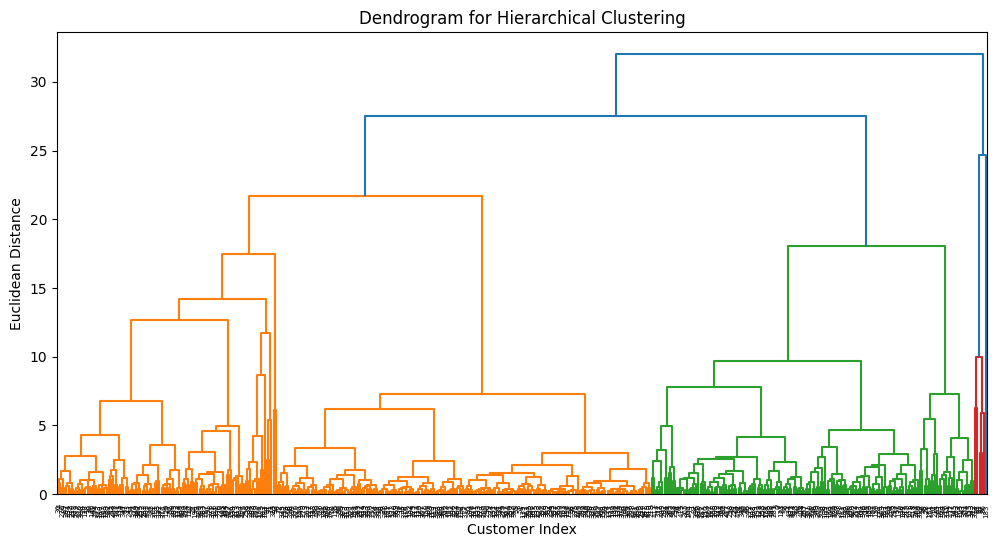

In [25]:
# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=wholesale_dataset.index.tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.show()

-> The dendrogram shows the hierarchical relationships among customers based on their spending behavior. By observing where the large jumps in distance occur, we can identify appropriate cluster boundaries.

In [27]:
# Cut the dendrogram to form flat clusters
threshold = 7.5  # This can be adjusted based on the dendrogram visualization
hierarchical_clusters = fcluster(linked, threshold, criterion='distance')

# Add Hierarchical cluster labels to the dataset
wholesale_dataset['Hierarchical_Cluster'] = hierarchical_clusters

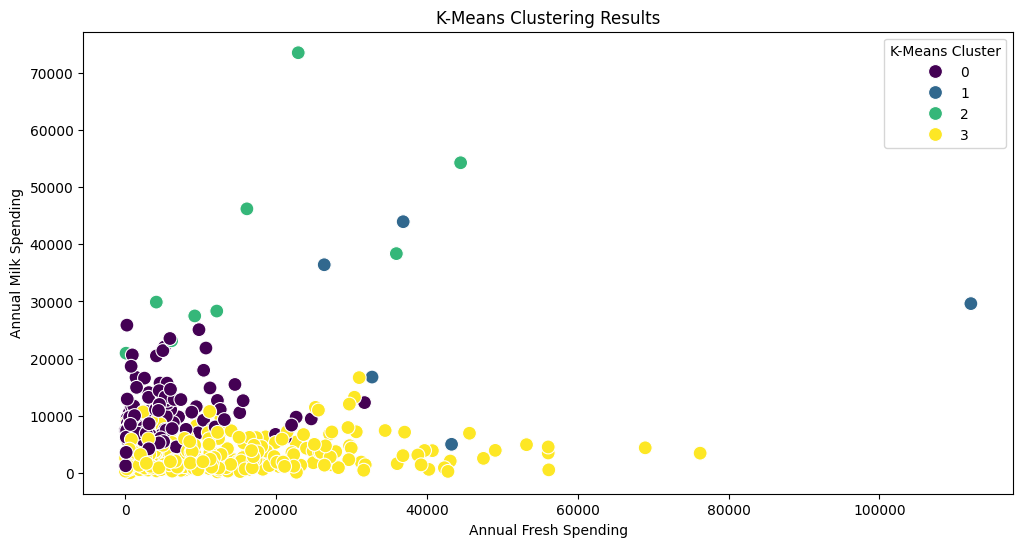

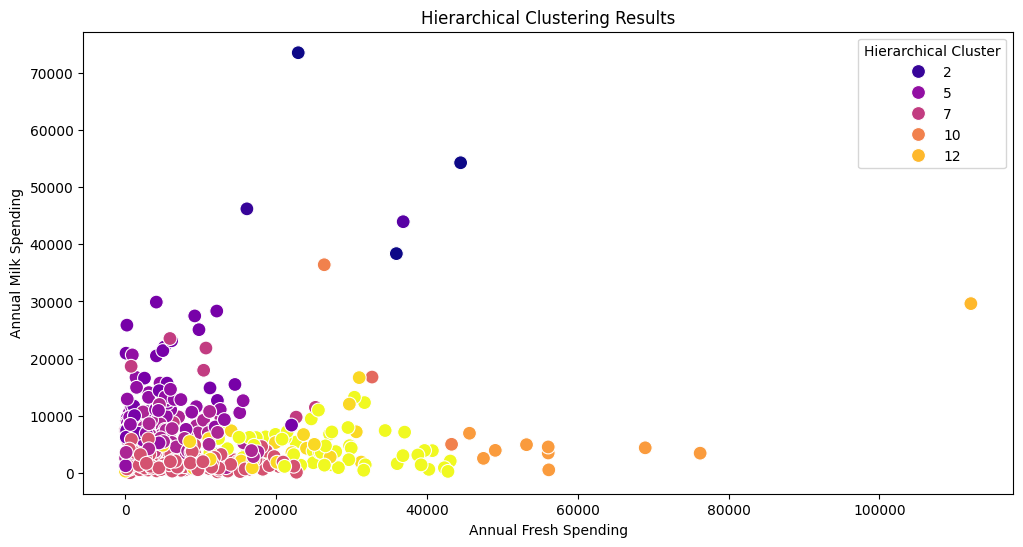

In [28]:
# Visualizing the clusters using a scatter plot for K-Means
plt.figure(figsize=(12, 6))
sns.scatterplot(data=wholesale_dataset, x='Fresh', y='Milk', hue='KMeans_Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Annual Fresh Spending')
plt.ylabel('Annual Milk Spending')
plt.legend(title='K-Means Cluster')
plt.show()

# Visualizing the clusters using a scatter plot for Hierarchical Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=wholesale_dataset, x='Fresh', y='Milk', hue='Hierarchical_Cluster', palette='plasma', s=100)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Annual Fresh Spending')
plt.ylabel('Annual Milk Spending')
plt.legend(title='Hierarchical Cluster')
plt.show()


<h4><b>K-Means Clustering Results:</b></h4>
<p>The K-Means scatter plot illustrates the distinct clusters formed based on customer spending, with customers grouped closely based on their annual spending in different categories.</p>

<h4><b>Hierarchical Clustering Results:</b></h4>
<p>The hierarchical clustering scatter plot may show different groupings compared to K-Means due to the flexible nature of hierarchical clustering, which can capture more intricate relationships among customers.</p>


<hr>

## <b>Exercise 05: Comparison of Clustering Results</b> 
#### <b>Task:</b> Compare the effectiveness of K-Means and hierarchical clustering on the Wholesale Customers dataset. Discuss the results in terms of cluster cohesion and separation.

<h3><b>Comparison of Clustering Results</b></h3>
<p>The effectiveness of K-Means and hierarchical clustering on the Wholesale Customers dataset can be assessed through cluster cohesion and separation. All the tasks done above are used to analyze and deduce these results.</p>

<h4><b>1) Cluster Cohesion:</b></h4>
<p>K-Means typically achieves strong cohesion within clusters as it minimizes the distance between points and their respective centroids. This results in tightly packed clusters, making it effective for datasets with spherical cluster shapes. Hierarchical clustering may exhibit varied cohesion depending on the linkage method used; while it can also create compact clusters, the flexibility in merging clusters can sometimes lead to less cohesive groups.</p>

<h4><b>2) Cluster Separation:</b></h4>
<p>K-Means may struggle with cluster separation when clusters are not well-defined or have overlapping boundaries, potentially leading to misclassification. Hierarchical clustering, particularly with methods like Ward's linkage, allows for a more nuanced separation of clusters by considering the relationships between all data points, often leading to clearer distinctions among customer segments.</p>

<h4><b>3) Overall Comparison:</b></h4>
<p>In summary, while K-Means is efficient and provides clear, compact clusters, hierarchical clustering offers more flexibility in capturing complex relationships. The choice between the two methods should depend on the specific data characteristics and the desired outcomes of the clustering analysis.</p>


<hr>